In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
column_names = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
data = pd.read_csv(r"abalone\abalone.data", names=column_names, header=None)

# Encode 'Sex' column
data['Sex'] = data['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# Features and target
X = data.drop(columns=['Rings'])
y = data['Rings'] + 1.5  # Age = Rings + 1.5

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Improved Linear Regression Results:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)


Improved Linear Regression Results:
MSE: 4.9503105029361905
RMSE: 2.224929325380065
MAE: 1.6067608598250238
R² Score: 0.5427053625654412


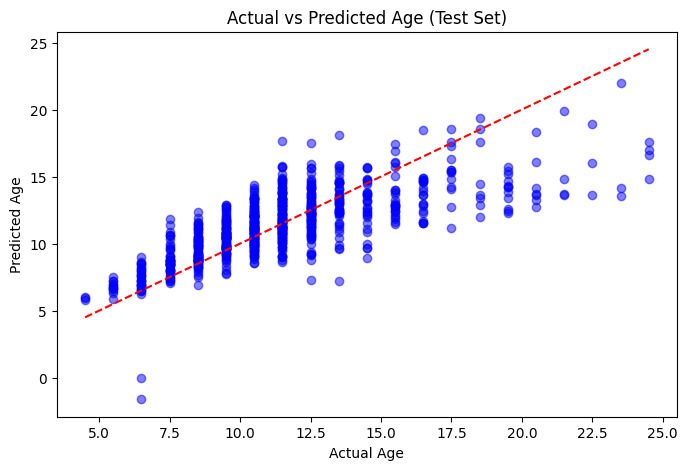

In [6]:
import matplotlib.pyplot as plt

# 1. Actual vs Predicted Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age (Test Set)")
plt.show()
